# Intro data science - portfolio assignment 10: Spotify dataset

15 min: Perform a bivariate analysis (Pearson correlation and scatter plot) on at least 1 combination of 2 columns with numeric data in the dataset that you chose in portfolio assignment 4. Does the correlation and scatter plot match your expectations? Add your answer to your notebook. Commit your Notebook to your portfolio when finished.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.close('all')

In [3]:
songs = pd.read_csv('datasets/04-top-spotify-songs-10s.csv', sep=',', engine='python')

In [4]:
songs.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


I suspect there is a correlation between the energy and danceability of a song. Let's use the Pearson correlation and a scatter plot to find out whether this is the case or not.

In [6]:
songs[['nrgy', 'dnce']].corr()

,nrgy,dnce
nrgy,1.000000,0.167209
dnce,0.167209,1.000000


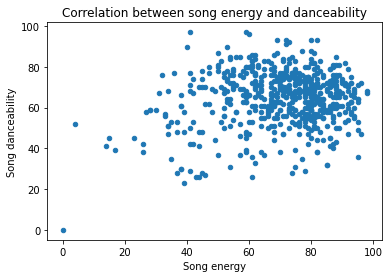

In [7]:
songs.plot(kind='scatter', x='nrgy', y='dnce')

plt.title('Correlation between song energy and danceability')
plt.xlabel('Song energy')
plt.ylabel('Song danceability')

plt.show()

Woah! There is almost no correlation. I did not expect this, but apparently high energy != high danceability.

What about bpm-nrgy & bpm-dnce?

In [9]:
songs[['bpm', 'nrgy']].corr()

,bpm,nrgy
bpm,1.00000,0.12617
nrgy,0.12617,1.00000


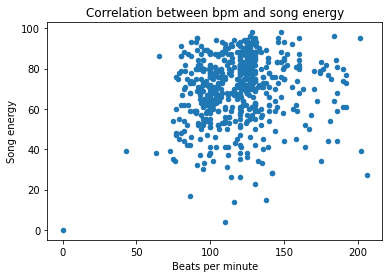

In [11]:
songs.plot(kind='scatter', x='bpm', y='nrgy')

plt.title('Correlation between bpm and song energy')
plt.xlabel('Beats per minute')
plt.ylabel('Song energy')

plt.show()

Once again, a very surprising result. I would expect higher bpm songs to be more energetic.

In [12]:
songs[['bpm', 'dnce']].corr()

,bpm,dnce
bpm,1.000000,-0.131301
dnce,-0.131301,1.000000


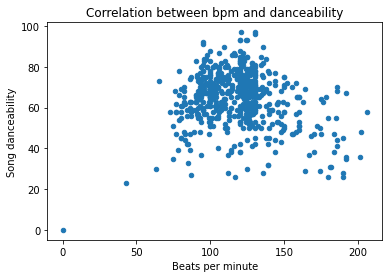

In [14]:
songs.plot(kind='scatter', x='bpm', y='dnce')

plt.title('Correlation between bpm and danceability')
plt.xlabel('Beats per minute')
plt.ylabel('Song danceability')

plt.show()

Once again, the same surprising result.

I really expected bpm, energy and danceability to go hand in hand.

Let's look at all the correlations to see if there is anything else that is interesting to look at.

In [15]:
songsCorr = songs.corr()
songsCorr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,Unnamed: 0,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Unnamed: 0,1.00,0.99,-0.11,-0.21,0.07,-0.13,-0.13,-0.13,-0.21,0.10,0.01,0.15
year,0.99,1.00,-0.10,-0.23,0.08,-0.13,-0.14,-0.12,-0.22,0.10,0.00,0.24
bpm,-0.11,-0.10,1.00,0.13,-0.13,0.18,0.08,0.02,-0.03,-0.11,0.06,0.02
nrgy,-0.21,-0.23,0.13,1.00,0.17,0.54,0.19,0.41,-0.14,-0.56,0.11,-0.06
dnce,0.07,0.08,-0.13,0.17,1.00,0.23,-0.03,0.50,-0.18,-0.24,-0.03,0.12
dB,-0.13,-0.13,0.18,0.54,0.23,1.00,0.08,0.28,-0.10,-0.19,-0.00,0.16
live,-0.13,-0.14,0.08,0.19,-0.03,0.08,1.00,0.02,0.10,-0.10,0.14,-0.08
val,-0.13,-0.12,0.02,0.41,0.50,0.28,0.02,1.00,-0.26,-0.25,0.12,0.04
dur,-0.21,-0.22,-0.03,-0.14,-0.18,-0.10,0.10,-0.26,1.00,0.09,0.05,-0.10
acous,0.10,0.10,-0.11,-0.56,-0.24,-0.19,-0.10,-0.25,0.09,1.00,0.00,0.03


The highest positive value is nrgy - db and the highest negative value is acous-nrgy. Let's have a look!

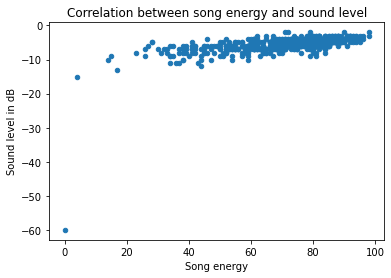

In [16]:
songs.plot(kind='scatter', x='nrgy', y='dB')

plt.title('Correlation between song energy and sound level')
plt.xlabel('Song energy')
plt.ylabel('Sound level in dB')

plt.show()

There seems to be an outlier at -60 dB, let's exclude this one for a clearer plot.

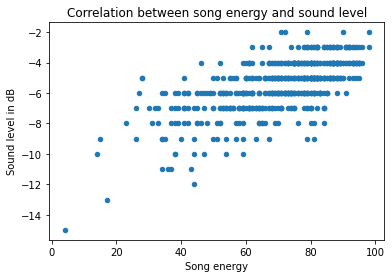

In [26]:
songs = songs[songs['dB'] > -20]

songs.plot(kind='scatter', x='nrgy', y='dB')

plt.title('Correlation between song energy and sound level')
plt.xlabel('Song energy')
plt.ylabel('Sound level in dB')

plt.show()

The correlation is much clearer here. As the sound level increases, so does the song energy.

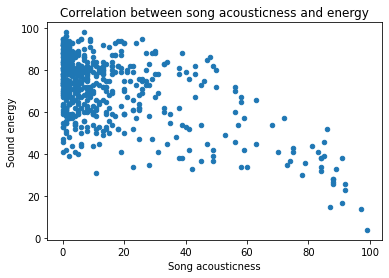

In [27]:
songs.plot(kind='scatter', x='acous', y='nrgy')

plt.title('Correlation between song acousticness and energy')
plt.xlabel('Song acousticness')
plt.ylabel('Sound energy')

plt.show()

What we see here is that most songs are barely acoustic, but as the acousticness increases, the song energy decreases.